In [1]:
import pandas as pd
import numpy as np
from functools import reduce
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.feature_extraction import stop_words
 


## this is the data I used, feel free to ignore

In [7]:
whole = pd.read_csv('complete_allbrands_users_captions_list.csv', encoding="latin-1")
whole = whole[whole['followers_count']>10000]
whole = whole[whole['followers_count']<100000]

data = whole

In [8]:
# This is not going to run
user = pd.read_csv('30users.csv')
k = list(user.jenniferyoungstudio)
k.append('jenniferyoungstudio')
k = pd.DataFrame(k, columns= ['username'])
k['joined'] = 1
result = pd.merge(k, data, on='username', how='outer')


    #### Note to Karan: 
    ### we need to pick our users. They don't match
data = result[result.joined==1]
data = data.dropna(axis=0, how='any')
data = (data.drop_duplicates(subset=['username'], keep='first')).reset_index()


In [ ]:
whole = (whole.sample(n=50)).reset_index()

In [ ]:
dftest = pd.concat([whole,data])

## be sure to call your DF "dftest" 

In [13]:
dftest = data

## dataframe and clean--> This cleans out the lists of strings, and turns it into just strings that can be vectorized into a dataframe called "df1991." 
## DF1991 lists all posts by caption, emoji, and user

## Note that I just took the first 25% of posts from each user. Feel free to undo this


In [14]:


userlist=[]
emojis = []
usernameforeachpost  = []
f2post = []
f3post = []

captionsfromsample = dftest


listof = []
for num, singlepost in enumerate(captionsfromsample.caption): 
    ## f1 separates by user. This is each user's total supply of posts
    f1 = singlepost.split("\', \'")

    # take only the first quarter of their text
    total= (len(f1)/4)
    f1 = f1[0:int(total)]
    f3 = []
    
    for j,k in enumerate(f1):

        userlist.append(dftest.username[num])
        
        f2 = (f1[j].replace("\n", " ")).replace("\\", "")
        
        #get emojis
        emoji = re.findall(r'[^\w\s,]', f2)
        emojis.append(emoji)
        
        f2post.append(f2)
        f3post.append(f3)
        f3.append(f2)
 



17 887 887 887 887


## This dataframe gives you a clean workspace

In [15]:
df1991 = pd.DataFrame({'caption': f2post, 'username': userlist, 'emojis': emojis}) 

### karan each row is a post. This dataframe will list everything you need

In [24]:
df1991.head()


,caption,emojis,username,polarity,vector
0,['Happy Halloween from Han Solo and Princess L...,"[[, ', !, !, @, @, #, #, #, #, #, #, #, #]",vanessaballi,0.0,"CountVectorizer(analyzer='word', binary=False,..."
1,A little #tbt to last years Cruella de Ville c...,"[#, !, , !, , !, ?, ?, #, #, #, #, #, #]",vanessaballi,0.0,"CountVectorizer(analyzer='word', binary=False,..."
2,Cant wait for tomorrow!!!! I hope to see all ...,"[, !, !, !, !, -, @, @, !, !, ?, ?, %, @, ., ...",vanessaballi,0.0,"CountVectorizer(analyzer='word', binary=False,..."
3,What dreams are made of!?? Met @rickz903 for l...,"[!, ?, ?, @, /, @, @, ., ., ., , !, ?, !, ?, ...",vanessaballi,0.0,"CountVectorizer(analyzer='word', binary=False,..."
4,7 months ago today @rickz903 and I got married...,"[@, ., !, ?, @, !, !, #, #]",vanessaballi,0.0,"CountVectorizer(analyzer='word', binary=False,..."


In [118]:
## I saved it for safe keeping
df1991.to_csv('clean_data.csv', sep=',')

## prepping to be vectorized. I used WP's tutorial. Let me know if you want it. 

In [19]:
df1991['polarity'] = np.zeros(len(df1991.caption))

vectorizer = CountVectorizer(stop_words=list(stop_words.ENGLISH_STOP_WORDS))#min_df=4
df1991['vector'] = vectorizer
corpus = df1991['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = df1991['polarity'].values

## it outputs words
## each line, token column
DF = pd.concat([pd.DataFrame(x), df1991.username], axis=1)


## the line below is used to merge the words used by users, rather than posts 

In [98]:
#DF_username = DF.groupby('username').sum(axis=0)

# Kmeans - euclidean.. can be changed to hamming, etc


In [20]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,10):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})

In [25]:
DFclusters.head()
## we talked about what this is :) 

,K_askedfor,clusternumber,listofwordspercluster
0,2,1,"[und, ich, die, mothersfinestblog, mothersfine..."
1,2,2,"[love, stylelife, like, just, ranrandesign, ng..."
2,3,1,"[just, guys, ve, day, username, like, today, h..."
3,3,2,"[und, love, ich, stylelife, like, die, ranrand..."
4,3,3,"[pumpkin, gdiapers, know, fall, summer, rounds..."


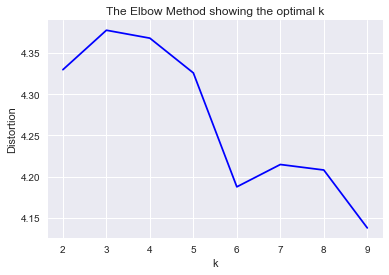

In [21]:
plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
######################

DFclusters.to_csv('DFclusters_eucl.csv', sep=',')
######################
######################

In [ ]:
#print(x.shape)
#y =np.vstack((x,order_centroids))
print('hi')


In [81]:
DFclusters
#list(DFclusters_hamming.listofwordspercluster[4:5])
"""
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(y)
X_embedded.shape

plt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")
plt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")"""

'\nfrom sklearn.manifold import TSNE\n\nX_embedded = TSNE(n_components=2).fit_transform(y)\nX_embedded.shape\n\nplt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")\nplt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")'

# Kmean - hamming

In [120]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,10):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'hamming'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters_hamming = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})

In [71]:
"""
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(y)
X_embedded.shape

plt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")
plt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")"""

'\nfrom sklearn.manifold import TSNE\n\nX_embedded = TSNE(n_components=2).fit_transform(y)\nX_embedded.shape\n\nplt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")\nplt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")'

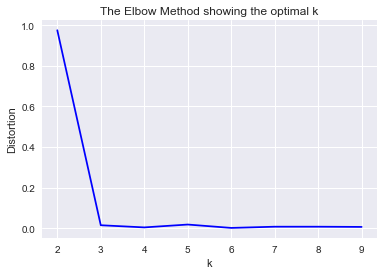

In [121]:
plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [122]:
DFclusters_hamming.to_csv('DFclusters_hamming_second_batch.csv', sep=',')

In [127]:
#DFclusters_hamming
list(DFclusters_hamming.listofwordspercluster[4:5])

[['just',
  've',
  'like',
  'yesterday',
  'username',
  'super',
  'fav',
  'fall',
  'simple',
  'ootd',
  'braid',
  'braids',
  'sooo',
  'weather',
  'happy',
  'cookie',
  'dough',
  'vegan',
  'flannel',
  'youtube',
  'video',
  'love',
  'pic',
  'hair',
  'new',
  'guys',
  'dutch',
  'did',
  'll',
  'uniwigs',
  'fun',
  'fashion',
  'bit',
  'plans',
  'foods',
  'wig',
  'morning',
  'style',
  'styles',
  'money',
  'flannels',
  'recreating',
  'recreate',
  'pictures',
  'buy',
  'fishtail',
  'changed',
  'curls',
  'change',
  'half',
  'lot',
  'day',
  'went',
  'pretty',
  'hairstyles',
  'actually',
  'best',
  'decided',
  'waterfall',
  'posting',
  'got',
  'think',
  'wanted',
  'want',
  'haha',
  'song',
  'jeans',
  'sh10',
  'make',
  'updo',
  'comment',
  'content',
  'hot',
  'awhile',
  'farmers',
  'feel',
  'doing',
  'sure',
  'use',
  'don',
  'hope',
  'code',
  'excited',
  'hairsandstyles',
  'completely',
  'looks',
  'loose',
  'car',
  'tu

# LDA 

In [34]:
tf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
#vectorizer

In [61]:
"""
from gensim import corpora, models
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)
lda = LdaModel(corpus, num_topics=100)  # train model
print(lda[doc_bow]) # get topic probability distribution for a document"""

'\nfrom gensim import corpora, models\n#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)\nlda = LdaModel(corpus, num_topics=100)  # train model\nprint(lda[doc_bow]) # get topic probability distribution for a document'

In [35]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10

# #Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [36]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, terms, no_top_words)

Topic 0:
und ich die mothersfinestme mothersfinestblog mamablog blogger_at igersaustria es momblog
Topic 1:
rrn interiordesign instagood mcm instadaily instamood design danielgermanidesigns lux photoftheday
Topic 2:
ng th makeupartist nh mình makeup ch có gi ko
Topic 3:
nan tumblr bom dia china portugal miss halloween grit hechoenespaña
Topic 4:
madamecloth izmir guzelyali cesme alacati fashion trendy madame ve pijama
Topic 5:
de que rrn la vanessamontorostyle vanessamontorocrochet para en handmade no
Topic 6:
by hair stylist fashion escobar manno for styling fashionblogger silk
Topic 7:
u200d instalike est instalove instagood centroestetico sicily nails gel magnetic
Topic 8:
new com summer fashion dolceinvita beachwear style www bikini biquini
Topic 9:
to in of you for my it with is this


# GMM

In [38]:
"""tf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
#vectorizer

from sklearn.mixture import GMM
gmm = GMM(n_components=6).fit((tf).toarray())
labels = gmm.predict(corpus)
plt.scatter(corpus[:, 0], corpus[:, 1], c=labels, s=40, cmap='viridis');"""

"tf = vectorizer.fit_transform(corpus)\nterms = vectorizer.get_feature_names()\n#vectorizer\n\nfrom sklearn.mixture import GMM\ngmm = GMM(n_components=6).fit((tf).toarray())\nlabels = gmm.predict(corpus)\nplt.scatter(corpus[:, 0], corpus[:, 1], c=labels, s=40, cmap='viridis');"

In [39]:
"""def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(gmm, terms, no_top_words)"""

'def display_topics(model, feature_names, no_top_words):\n    for topic_idx, topic in enumerate(model.components_):\n        print("Topic %d:" % (topic_idx))\n        print(" ".join([feature_names[i]\n                        for i in topic.argsort()[:-no_top_words - 1:-1]]))\n\nno_top_words = 10\n#display_topics(nmf, tfidf_feature_names, no_top_words)\ndisplay_topics(gmm, terms, no_top_words)'

In [129]:
whole = pd.read_csv('DFclusters_hamming_final_7.csv', sep=',')

In [130]:
whole

,Unnamed: 0,K_askedfor,clusternumber,listofwordspercluster
0,0,2,1,"['in', 'to', 'of', 'for', 'you', 'my', 'it', '..."
1,1,2,2,"['und', 'ich', 'die', 'mothersfinestme', 'moth..."
2,2,3,1,"['rrn', 'de', 'in', 'by', 'cachefashionshop', ..."
3,3,3,2,"['in', 'to', 'of', 'for', 'my', 'you', 'it', '..."
4,4,3,3,"['in', 'to', 'nduoconcept', 'link', 'bio', 'ta..."
5,5,4,1,"['in', 'to', 'of', 'for', 'you', 'my', 'it', '..."
6,6,4,2,"['rn', 'startuplife', 'publicrelations', 'digi..."
7,7,4,3,"['in', 'to', 'nduoconcept', 'link', 'bio', 'ta..."
8,8,4,4,"['und', 'ich', 'die', 'mothersfinestme', 'moth..."
9,9,5,1,"['to', 'in', 'of', 'my', 'it', 'for', 'link', ..."


In [138]:
list(whole.listofwordspercluster[26:27])

["['to', 'my', 'it', 'of', 'in', 'for', 'you', 'this', 'is', 'with', 'so', 'that', 'on', 'me', 'like', 'your', 'was', 'just', 'but', 'all', 'are', 'have', 'love', 'can', 'today', 'we', 'out', 'from', 'how', 'what', 'by', 'at', 'be', 'get', 'day', 'do', 'about', 'new', 'link', 'pic', 'up', 've', 'one', 'her', 'see', 'more', 'beauty', 'if', 'hair', 'when', 'some', 'life', 'guys', 'because', 'way', 'there', 'into', 'now', 'liketoknow', 'super', 'beautiful', 'got', 'who', 'had', 'will', 'profile', 'braids', 'our', 'want', 'think', 'much', 'feel', 'would', 'off', 'really', 'dutch', 'time', 'she', 'been', 'blonde', 'excited', 'too', 'http', 'still', 'week', 'as', 'am', 'training', 'blog', 'details', 'something', 'ad', 'liketk', 'good', 'best', 'being', 'not', 'happy', 'braid', 'fall', 'look', 'make', 'halloween', 'liketkit', 'go', 'app', 'thanks', 'us', 'morning', 'here', 'know', 'their', 'shop', 'has', 'first', 'fun', 'athleisure', 'll', 'went', 'next', 'fishtail', 'any', 'video', 'also', '

In [156]:
list0 = ['bohochic', 'bohemian', 'blue', 'pompom', 'kimono', 'flowerprint', 'gypset']
newlist = []
for i,v in enumerate(list0):
    
    f2 = (v.replace("\'", " ")).replace(",", "")
    print(f2)
    newlist.append(f2)
    

bohochic
bohemian
blue
pompom
kimono
flowerprint
gypset


In [145]:
newlist.replace("\'", " ").replace(",", "")

AttributeError: 'list' object has no attribute 'replace'

In [142]:
#pd.DataFrame(newlist)
(pd.DataFrame(newlist)).to_csv('909090909090909.txt')